Load the dataset

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_da_vn = df[(df['job_country'] == 'Vietnam') & (df['job_title_short'] == 'Data Analyst')].copy()

# Research Question: Which skills are most effective for newcomers (in terms of opportunities & salary)?

Methodology
1. Group skills to determine median salary and likelihood of being in posting
2. Visulize median salary vs percent skill demand
3. Determine if certain technologies are more prevalent

Group skills to determine median salary and likelihood of being in posting

In [3]:
df_da_vn = df_da_vn.dropna(subset=['salary_year_avg'])

df_da_vn_exploded = df_da_vn.explode('job_skills')

df_da_vn_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
134303,111175.0,sql
134303,111175.0,power bi
207881,100500.0,sql
207881,100500.0,python
207881,100500.0,looker


In [9]:
df_da_skills = df_da_vn_exploded.groupby('job_skills')['salary_year_avg'].agg(['median', 'count']).sort_values(by='count', ascending=False).head(10)

df_da_skills = df_da_skills.rename(columns={'median': 'median_salary', 'count': 'job_postings'})

df_da_skills['skil_likelihood'] = df_da_skills['job_postings'] / len(df_da_vn) * 100

skil_likelihood = 18

df_da_skills_high_demand = df_da_skills[df_da_skills['skil_likelihood'] > skil_likelihood]

df_da_skills_high_demand

,median_salary,job_postings,skil_likelihood
job_skills,,,
sql,64282.0,8,72.727273
power bi,53014.0,5,45.454545
python,63282.0,4,36.363636
tableau,53014.0,3,27.272727
oracle,63282.0,2,18.181818
mongodb,48000.0,2,18.181818
java,63282.0,2,18.181818
macos,53014.0,2,18.181818
windows,53014.0,2,18.181818


Visulize median salary vs percent skill demand

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


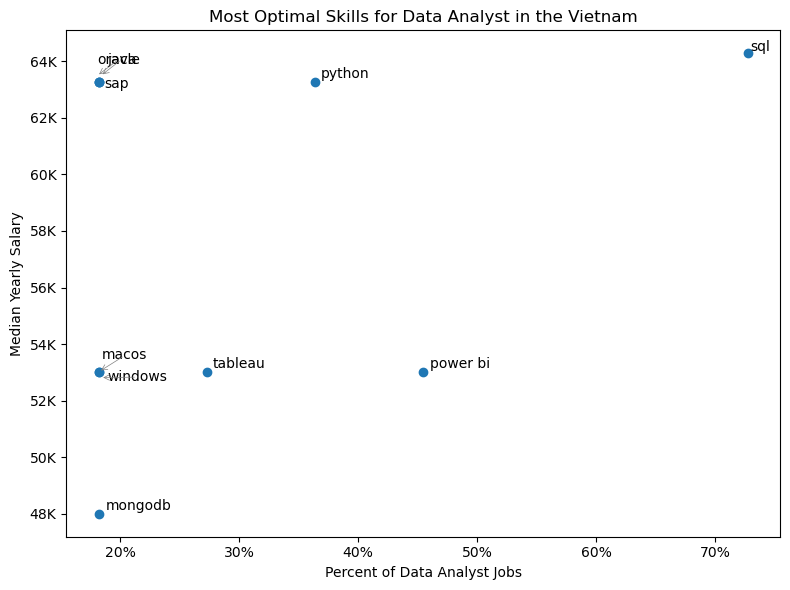

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df_da_skills_high_demand['skil_likelihood'], 
    df_da_skills_high_demand['median_salary']
)

texts = []
for i, txt in enumerate(df_da_skills_high_demand.index):
    x_val = df_da_skills_high_demand['skil_likelihood'].iloc[i]
    y_val = df_da_skills_high_demand['median_salary'].iloc[i]

    if txt.lower() == "windows":
        texts.append(plt.text(x_val+0.15, y_val-200, txt))  
    elif txt.lower() == "oracle":
        texts.append(plt.text(x_val-0.15, y_val+200, txt))  
    elif txt.lower() == "java":
        texts.append(plt.text(x_val+0.15, y_val+200, txt))  
    else:
        texts.append(plt.text(x_val, y_val, txt))

from adjustText import adjust_text
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
    expand_points=(1.2, 1.2),
    expand_text=(1.2, 1.2),
    force_points=0.6,
    force_text=0.6,
)

plt.title('Most Optimal Skills for Data Analyst in the Vietnam')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, post: f'{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

Determine if certain technologies are more prevalent

In [14]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates().dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict
        

{'analyst_tools': ['looker',
  'sas',
  'datarobot',
  'qlik',
  'tableau',
  'microstrategy',
  'ssis',
  'power bi',
  'nuix',
  'msaccess',
  'spreadsheet',
  'alteryx',
  'ms access',
  'sharepoint',
  'esquisse',
  'sap',
  'ssrs',
  'spss',
  'sheets',
  'visio',
  'excel',
  'dax',
  'outlook',
  'splunk',
  'powerpoint',
  'cognos',
  'word',
  'powerbi'],
 'programming': ['typescript',
  'golang',
  'delphi',
  'sas',
  'visualbasic',
  'elixir',
  'lisp',
  'vba',
  'solidity',
  'python',
  'nosql',
  'javascript',
  'css',
  'mongo',
  'erlang',
  'php',
  'c++',
  'cobol',
  'objective-c',
  'rust',
  'swift',
  'groovy',
  'apl',
  'assembly',
  'c#',
  'matlab',
  'mongodb',
  'ruby',
  'scala',
  'no-sql',
  'vb.net',
  'visual basic',
  'shell',
  'f#',
  'dart',
  'clojure',
  'sql',
  'html',
  't-sql',
  'pascal',
  'lua',
  'go',
  'powershell',
  'perl',
  'bash',
  'r',
  'kotlin',
  'sass',
  'fortran',
  'ocaml',
  'java',
  'c',
  'julia',
  'crystal',
  'hask

In [15]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,looker
0,analyst_tools,sas
0,analyst_tools,datarobot
0,analyst_tools,qlik
0,analyst_tools,tableau
...,...,...
9,sync,rocketchat
9,sync,slack
9,sync,twilio
9,sync,webex


In [16]:
df_plot = df_da_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

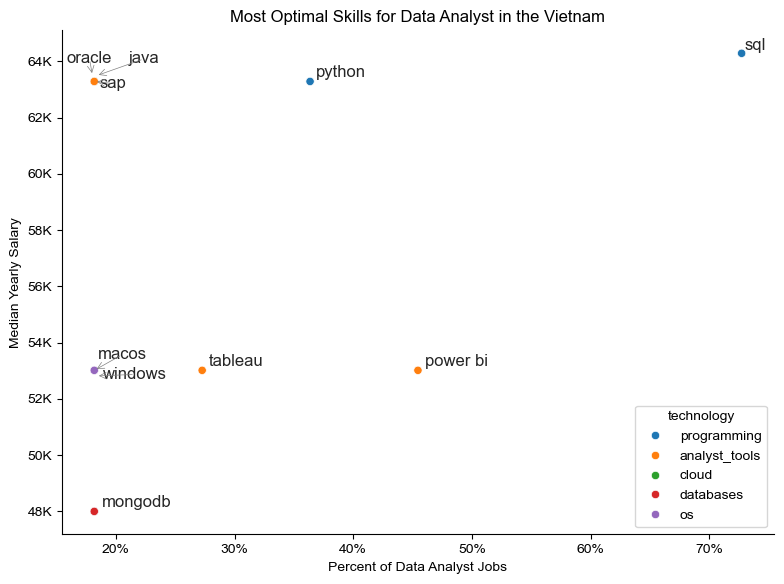

In [18]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=df_plot,
    x='skil_likelihood',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_da_skills_high_demand.index):
    x_val = df_da_skills_high_demand['skil_likelihood'].iloc[i]
    y_val = df_da_skills_high_demand['median_salary'].iloc[i]

    if txt.lower() == "windows":
        texts.append(plt.text(x_val+0.15, y_val-200, txt))  
    elif txt.lower() == "oracle":
        texts.append(plt.text(x_val-0.15, y_val+200, txt))  
    elif txt.lower() == "java":
        texts.append(plt.text(x_val+0.15, y_val+200, txt))  
    else:
        texts.append(plt.text(x_val, y_val, txt))

from adjustText import adjust_text
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
    expand_points=(1.2, 1.2),
    expand_text=(1.2, 1.2),
    force_points=0.6,
    force_text=0.6,
)

plt.title('Most Optimal Skills for Data Analyst in the Vietnam')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, post: f'{int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()